## Fechas y Horas

Este es un caso especial de variables categóricas en el cual en vez de tener los grupos o categorías tradicionales, como color (azul, rojo), o ciudad (London, Manchester), las categorias son fechas y/o horas. Por ejemplo, fecha de nacimiento ('29-08-1987', '12-01-2012'), o fecha de aplicación ('2016-Dic', '2013-Marzo').

Variables 'datetime' por su nombre en inglés, pueden tomar valores ya sea solo de fechas, solo horas o ambos fechas y horas.

Usualmente, no manipulamos este tipo de variables en su formato crudo porque:

- Variables con fechas tienen un gran número de diferentes categorías
- Una gran cantidad de información valiosa puede ser extraída de las variables 'datetime' si se preprocesan correctamente

Además, usualmente con este tipo de variables, puede suceder que las fechas que se usaron en los datos para entrenar un modelo predictivo, no esten presentes en los datos que se usan para validar el modelo. De hecho, las variables pueden contener fechas en el futuro, con respecto a las fechas que se usaron para entrenar el modelo. Por lo tanto, el modelo predictivo no sabría que hacer con ellas, porque nunca estuvieron presentes durante el modelamiento.

**Se cubrirán diferentes formas de pre-procesamiento/ingeniería para las variables 'datetime' en la seccion "Ingenería de variables datetime" más adelante en el curso**

=============================================================================

## En este demo: Préstamos Peer-to-peer (P2P)

En este demo, usaremos datos de la companía financiera especializada en préstamos peer-to-peer llamada **Lending Club** para examinar variables categóricas.

- Para descargar los datos, por favor referirse a la sección de **Datos** de la **Clase 1** del curso.

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
# Carguemos los datos con solo unas columnas.

# Definición de variables:
#-------------------------
# loan_amnt: Valor del préstamo
# purpose: propósito/intención de uso del préstamo 
# grade: nivel de riesgo en el cual prestamista asignado
# issue_d: fecha en la cual el préstamo fué aprobado
# last_pymnt_d: fecha del último pago 

use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('../loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-2018,debt_consolidation,Feb-2019
1,30000,D,Dec-2018,debt_consolidation,Feb-2019
2,5000,D,Dec-2018,debt_consolidation,Feb-2019
3,4000,D,Dec-2018,debt_consolidation,Feb-2019
4,30000,C,Dec-2018,debt_consolidation,Feb-2019


In [8]:
# pandas asigna el tipo 'object' cuando lee formatos de fechas
# y los considera cadenas.

data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

Ambas issue_d y last_pymnt_d son convertidas a objetos ('object'). Por lo tanto, pandas las manipula como cadenas o variables categóricas. 

Para que pandas procese estas variables como fechas, es necesario convertirlas nuevamente a formato datetime. 

In [9]:
# Convirtamos estas variables de su formato actual de cadena a formato 'datetime'
# esto nos permitirá hacer un análisis mas avanzado 

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


Text(0, 0.5, 'Cantidad Desembolsada  (USD)')

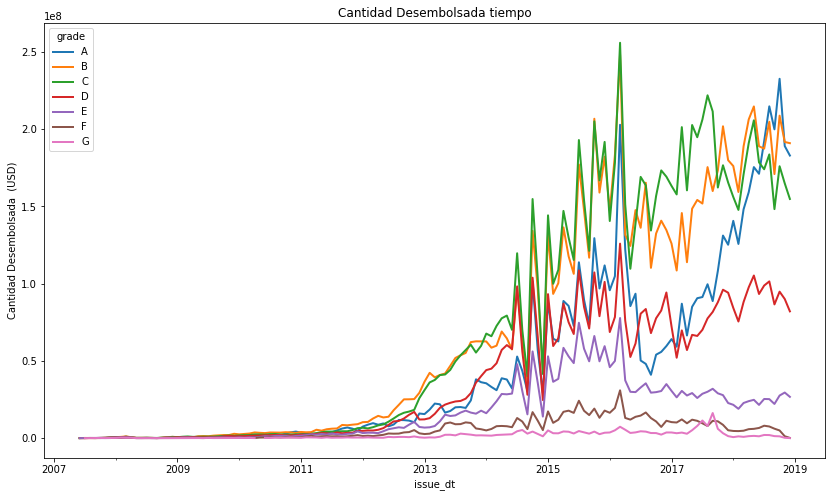

In [10]:
# Miremos cuanto dinero el Lending Club ha desembolsado en préstamos
# en los últimos años para los diferentes niveles de riesgo
# (variable 'grade')

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Cantidad Desembolsada tiempo')
fig.set_ylabel('Cantidad Desembolsada  (USD)')

Lending Club parece haber incrementado la cantidad de dinero que otorga en préstamos desde el 2013, una tendencia que parece continuar. Además, podemos ver que la mayoria de préstamos estan en las categorías de riesgo C y B ('grade').

La categoría ('grade') 'A' es la de menor riesgo, los prestamistas en este grupo probablemente pagarán toda su deuda, ya que por lo general están en una mejor situación financiera. En esta categoría, las tasas de interés son mas bajas.

Categorías E, F y G  representan mayor riesgo. Usualmente los prestamistas estan en una situacion financiera más precaria o no tienen suficiente historia crediticia para hacer una evaluación fiable. Típicamente, se les cobran tasas de interés más altas, ya que la entidad financiera (y sus inversores) estan tomando un riesgo mayor al otorgales el crédito. 

**Esto es todo por este demo, esperamos lo hayan disfrutado y nos vemos en el siguiente. **